In [1]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecionando os dados do iris
df = sns.load_dataset("iris")

# Nome das espécies de flores
list(df['species'].unique())

X = df.drop(columns='species').copy()

print(X.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


kmeans

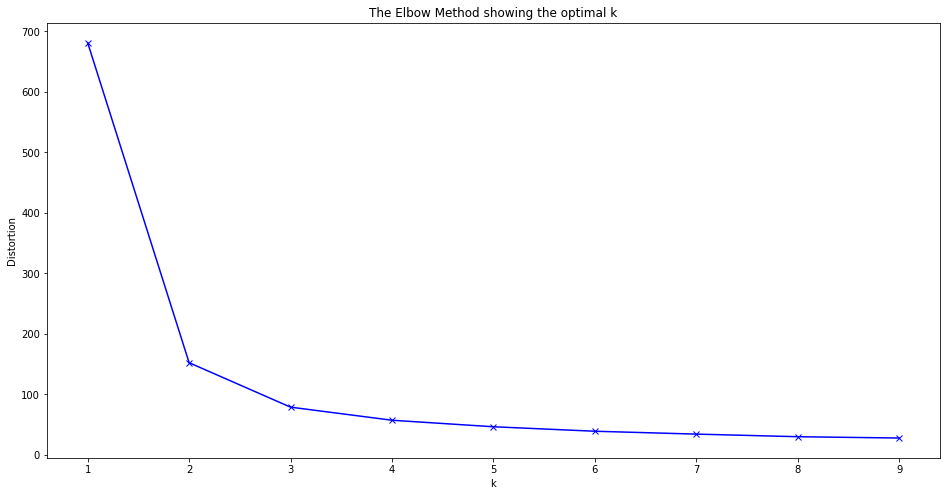

K = 2
Espécie setosa Cluster 0 - Percentual de acerto 100%
Espécie versicolor Cluster 1 - Percentual de acerto 94%
Espécie virginica Cluster 1 - Percentual de acerto 100%
K = 3
Espécie setosa Cluster 0 - Percentual de acerto 100%
Espécie versicolor Cluster 2 - Percentual de acerto 96%
Espécie virginica Cluster 1 - Percentual de acerto 72%
K = 4
Espécie setosa Cluster 0 - Percentual de acerto 100%
Espécie versicolor Cluster 1 - Percentual de acerto 54%
Espécie virginica Cluster 2 - Percentual de acerto 64%
K = 5
Espécie setosa Cluster 1 - Percentual de acerto 100%
Espécie versicolor Cluster 4 - Percentual de acerto 52%
Espécie virginica Cluster 0 - Percentual de acerto 48%


In [3]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

# Centroides das entradas
kmeans.cluster_centers_

# Clusters das entradas
kmeans.labels_

# Validação da divisão dos clusters
X_valida = X.copy()
df_valida = df.copy()
for i in range(2, 6):
    kmeans_valida = KMeans(n_clusters = i)
    kmeans_valida.fit(X_valida)
    df_valida['kmeans'] = kmeans_valida.labels_
    print('K =', i)
    for j in list(df['species'].unique()):
        per_valida = df_valida.query('species == @j')['kmeans'].value_counts().max()/df_valida.query('species == @j').shape[0]
        class_valida = df_valida.query('species == @j')['kmeans'].value_counts().index[0]
        print('Espécie {}'.format(j), 'Cluster', class_valida, '- Percentual de acerto {:.0%}'.format(per_valida))
    print(55*'=')




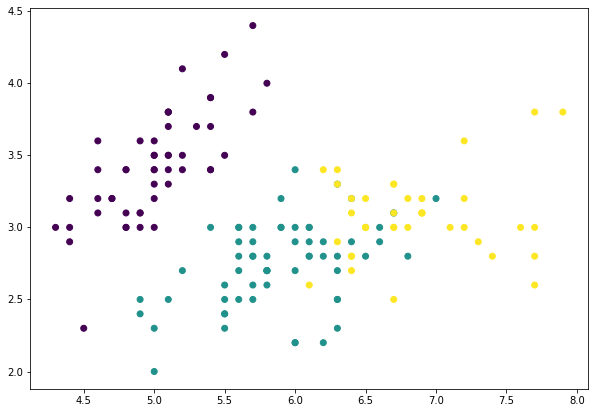

In [6]:
plt.figure(figsize=(10, 7))  
plt.scatter(X['sepal_length'], X['sepal_width'], c= kmeans.labels_) 
plt.show()

In [ ]:
df['k_means']=kmeans.predict(X)
df['target']=X['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

db scan sklearn

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Simple db scan

In [ ]:
from sklearn.cluster import DBSCAN
    # cluster the data into five clusters
    dbscan = DBSCAN(eps = 0.8 , min_samples = 2).fit(X) # fitting the model
    labels = dbscan.labels_ # getting the labels

    plt.figure(figsize=(10, 7))  
    plt.scatter(X['sepal_length'], X['sepal_width'], c= labels) 
    plt.show()

Botton up com linkages 

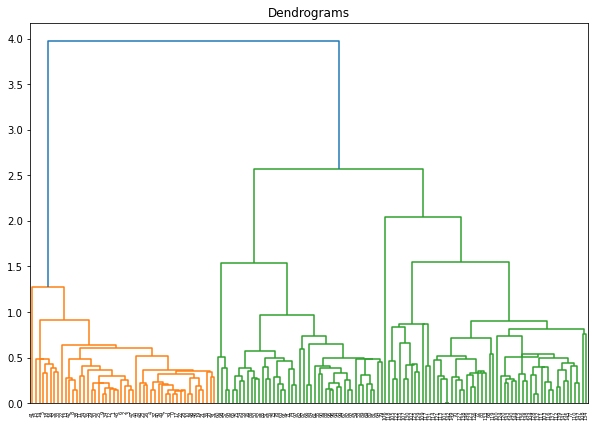

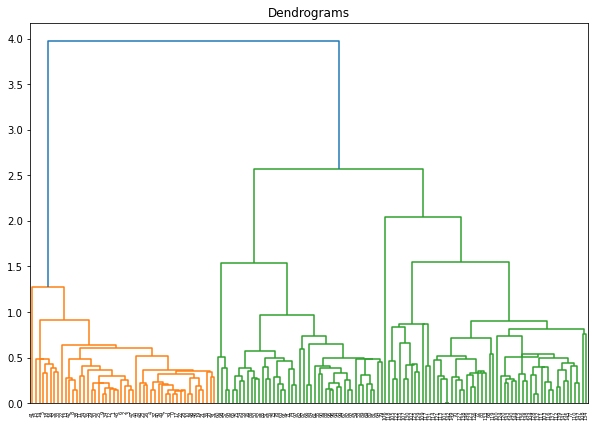

ValueError: Unknown linkage type centroid. Valid options are dict_keys(['ward', 'complete', 'average', 'single'])

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.show()

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.show()


from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
print(cluster.fit_predict(X))

plt.figure(figsize=(10, 7))  
plt.scatter(X['sepal_length'], X['sepal_width'], c= cluster.labels_) 
plt.show()


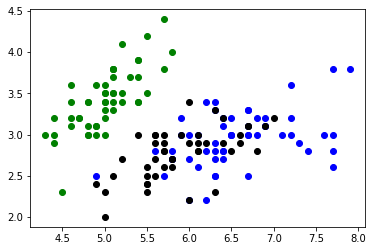

In [5]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['sepal_length',  'sepal_width',  'petal_length',  'petal_width', 'cluster']

color=['blue','green', 'black']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["sepal_length"],data["sepal_width"],c=color[k])
plt.show()